#### Dimensionality Reduction

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
# extra code

import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

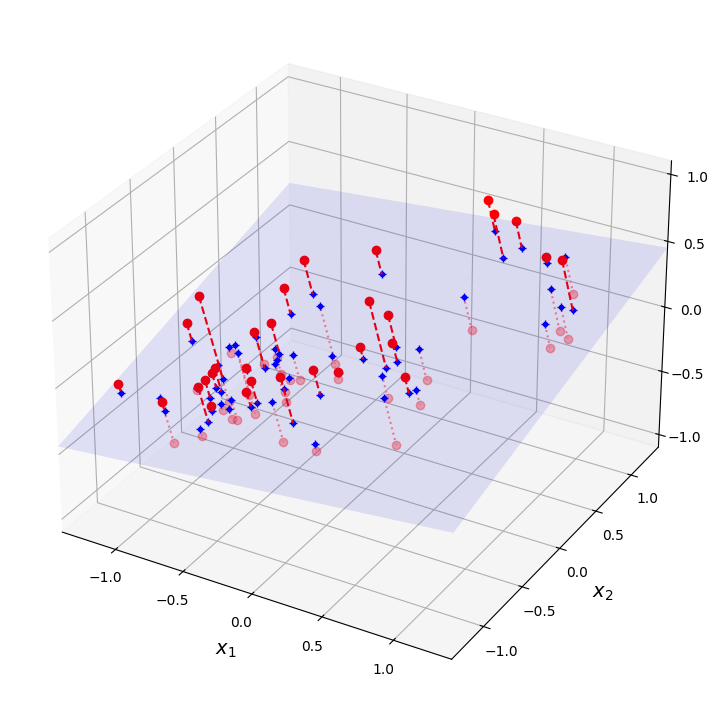

In [3]:
# extra code – this cell generates and saves Figure 8–2

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # dataset reduced to 2D
X3D_inv = pca.inverse_transform(X2D)  # 3D position of the projected samples
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # projection plane coefs
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # plane
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # samples above plane
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # samples below plane

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# plot samples and projection lines below plane first
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # projection plane
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # projected samples
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# now plot projection lines and samples above plane
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

# save_fig("dataset_3d_plot", tight_layout=False)
plt.show()

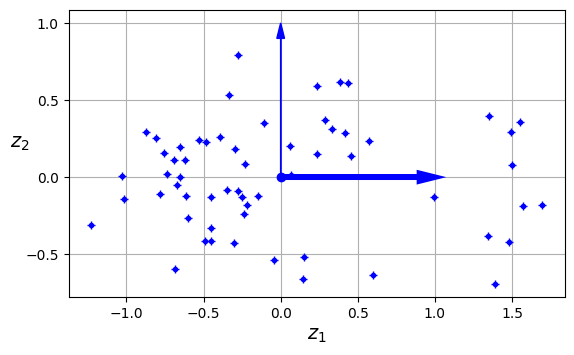

In [4]:
# extra code – this cell generates and saves Figure 8–3

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)
# save_fig("dataset_2d_plot")

##### Manifold Learning

In [5]:
from sklearn.datasets import make_swiss_roll

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

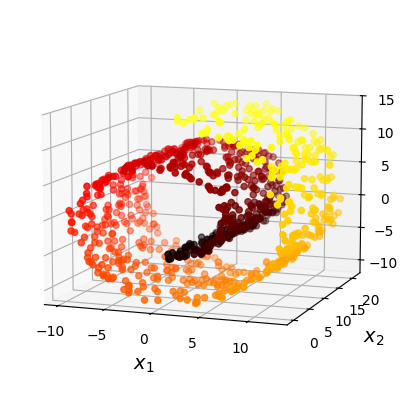

In [6]:
# extra code – this cell generates and saves Figure 8–4

from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
set_xyz_axes(ax, axes)
# save_fig("swiss_roll_plot")
plt.show()

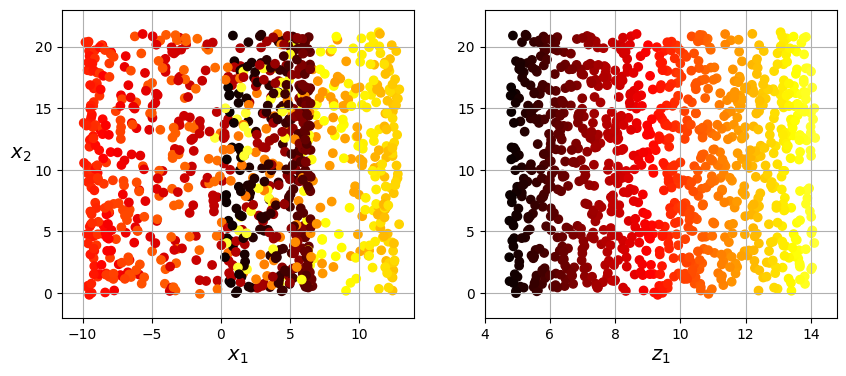

In [7]:
# extra code – this cell generates and saves plots for Figure 8–5

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X_swiss[:, 0], X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", labelpad=10, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis([4, 14.8, axes[2], axes[3]])
plt.xlabel("$z_1$")
plt.grid(True)

# save_fig("squished_swiss_roll_plot")
plt.show()

### Principal Component Analysis

In [8]:
import numpy as np

In [10]:
from sklearn.datasets import fetch_openml

In [11]:
mnist = fetch_openml('mnist_784',as_frame=False)

In [12]:
X_train,y_train = mnist.data[:60000], mnist.target[:60000]
X_test,y_test = mnist.data[60000:], mnist.target[60000:]

In [13]:
pca = PCA()

In [14]:
pca.fit(X_train)

PCA()

In [15]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [18]:
d = np.argmax(cumsum >= 0.95)+1

In [19]:
d

np.int64(154)

In [20]:
pca = PCA(n_components=0.95)

In [21]:
X_reduced = pca.fit_transform(X_train)

In [23]:
len(X_reduced[0])

154

In [24]:
len(X_train[0])

784

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

In [26]:
clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))

In [27]:
param_distrib = {
    "pca__n_components":np.arange(10,80),
    'randomforestclassifier__n_estimators':np.arange(50,500)
}

In [28]:
rnd_search = RandomizedSearchCV(clf, param_distrib ,n_iter=10, cv =3,random_state=42)

In [29]:
rnd_search.fit(X_train[:10000],y_train[:10000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [30]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': np.int64(304),
 'pca__n_components': np.int64(62)}

In [31]:
X_recovered = pca.inverse_transform(X_reduced)

In [32]:
len(X_recovered[0])

784

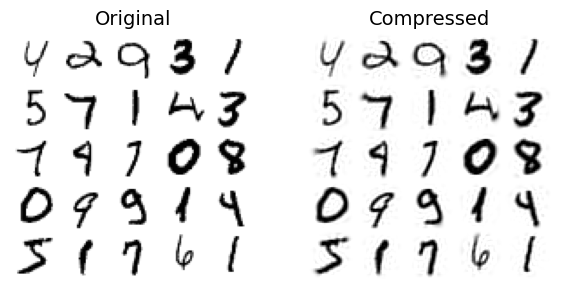

In [33]:
# extra code – this cell generates and saves Figure 8–9

plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

# save_fig("mnist_compression_plot")

##### Incremental PCA

In [34]:
from sklearn.decomposition import IncrementalPCA


n_batches = 100

inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train,n_batches):

    inc_pca.partial_fit(X_batch)





In [35]:
X_reduced = inc_pca.transform(X_train)

In [37]:
X_reduced[0]

array([ 1.23932400e+02,  3.12674128e+02,  2.45139686e+01,  5.55757560e+02,
       -2.72962068e+01,  2.32475124e+02,  2.33995122e+02,  1.59798418e+02,
       -3.63516397e+02,  1.98427480e+02, -1.97495845e+02, -2.54058936e+02,
        1.13501639e+02,  7.49306444e+02, -2.19267126e+02,  4.69858621e+00,
       -3.30148575e+02,  3.09167226e+02,  2.77582382e+02,  1.66340220e+02,
       -2.75482292e+01, -6.43536726e+01,  2.17172396e+02, -2.50237589e+02,
       -4.61738634e+01,  1.00333512e+02,  3.08004851e+02,  1.70098206e+02,
       -1.25498768e+02, -1.23403180e+02, -9.79818887e+01,  3.45682453e+01,
       -1.07504828e+02,  8.46151514e+01, -1.52422420e+02, -2.00832326e+02,
       -6.52578167e+01, -2.00132287e+02, -1.57633683e+02, -3.59832669e+02,
        1.85552768e+02, -1.54402340e+02,  4.02172643e+01,  8.50024490e+01,
        1.23805854e+02, -7.05303619e+00, -1.27533120e+02,  7.65248201e+01,
        3.42094821e+01,  1.97763342e+01, -1.30334345e+02, -1.09581457e+02,
       -1.18298575e+02, -

In [40]:
n = 20000

np.random.seed(42)

P = np.random.randn(7300,n)/np.sqrt(7300)

In [41]:
X = np.random.randn(5000,n)

In [46]:
len(X[0])

20000

In [38]:
from sklearn.random_projection import GaussianRandomProjection 

In [42]:
gaussian_rnd_proj =  GaussianRandomProjection(eps =0.1, random_state=42)

X_reduced = gaussian_rnd_proj.fit_transform(X)

In [44]:
len(X_reduced[0])

7300

##### Manifold Learning -  Locally Linear Embedding Model

In [48]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

In [49]:
X_swiss, t = make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)

In [50]:
X_unrolled = lle.fit_transform(X_swiss)

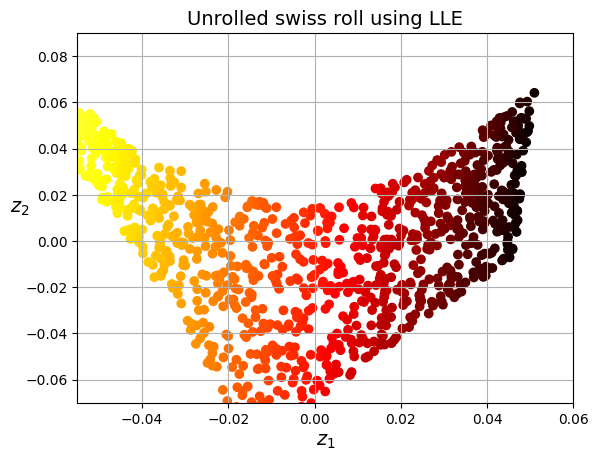

In [52]:
# extra code – this cell generates and saves Figure 8–10

plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)

# save_fig("lle_unrolling_plot")
plt.title("Unrolled swiss roll using LLE")
plt.show()